# Build the model

In [2]:
import numpy as np 
from collections import Counter


# KNN use euclidienne distance
def euclidienne_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))


class KNN_Classifier:
    # Constructor
    def __init__(self , k):
        self.k = k
    
    # fit the model KNN
    def fit(self , X , y):
        self.X_train = X
        self.y_train = y
    

    # predict labels of X_test
    def predict(self, X):
        predicted_labels=[self._predict(x) for x in X]
        return np.array(predicted_labels)


    # helper function to predict label of one sample
    def _predict(self,x):

        # calculate distances between x and all samples of X_train
        distances = [euclidienne_distance(x,x1) for x1 in self.X_train]

        # sort distances from min to max and save indices
        indices = np.argsort(distances)

        #  k nearest neighbours
        k_nearest = indices[:self.k]

        # get labels
        labels = [self.y_train[i] for i in k_nearest]

        # its a classifier => most common labels

        most_common = Counter(labels).most_common(1) # it returns the most commun label in this format [(label , occurence)]

        return most_common[0][0] # to get just the label
        

    def score(self,X,y):
        predictions = self.predict(X)
        acc = np.sum(predictions == y)/len(y)
        return acc


# Test the model

### 1) import dataset

In [3]:
from sklearn import datasets

iris = datasets.load_iris()

In [4]:
iris.data.shape , iris.target.shape

((150, 4), (150,))

In [5]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train,X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### 2) make predictions and test the model

In [6]:
model = KNN_Classifier(k=3)

model.fit(X_train,y_train)

predictions = model.predict(X_test)

predictions

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [7]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [8]:
model.score(X_test,y_test)

1.0

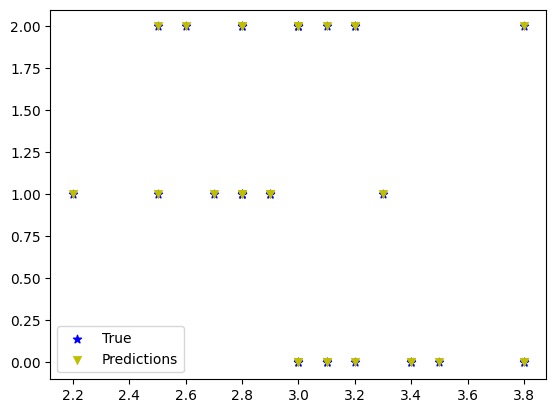

In [37]:
import matplotlib.pyplot as plt 

features0 = [x[0] for x in X_test] # the first column of X choose what ever you want
features0 = np.array(features0)


predicted_labels = model.predict(X_test)


plt.scatter(features0,y_test,c='b',marker='*',label = 'True')
plt.scatter(features0,predicted_labels,c='y',marker='v',linewidths=0.5,label ='Predictions')
plt.legend()
plt.show()